## Install required libraries not from Colaboratory

In [36]:
!pip install gseapy

## Import required libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
from google.colab import drive

## Mount dataset file

In [38]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read dataframe and select columns

---



In [39]:
df = pd.read_csv('/content/drive/My Drive/Dataset599.csv')

In [40]:
df

,ENSEMBL,SYMBOL,GENENAME,REFSEQ,ENTREZID,STRING_id,GOSLIM_IDS,GSM6996077,GSM6996078,GSM6996079,...,Log2fc_(Space Flight)v(Ground Control),Stat_(Space Flight)v(Ground Control),P.value_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control),All.mean,All.stdev,Group.Mean_(Ground Control),Group.Mean_(Space Flight),Group.Stdev_(Ground Control),Group.Stdev_(Space Flight)
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...,NM_010306|NP_034436,14679,10090.ENSMUSP00000000001,GO:0051339|GO:0007188|GO:0010646|GO:0051716|GO...,545.724308,480.893440,395.108910,...,-0.134988,-0.722508,0.469982,0.947622,452.770855,55.502581,473.908900,431.632800,75.550230,25.554930
1,ENSMUSG00000000028,Cdc45,cell division cycle 45,NM_001161623|NM_001358206|NM_009862|NP_0011550...,12544,10090.ENSMUSP00000000028,GO:0044085|GO:0000280|GO:0010467|GO:1903507|GO...,43.077786,38.033406,35.553367,...,0.226611,0.522420,0.601378,0.964207,42.151170,13.055030,38.888190,45.414150,3.834346,19.479249
2,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript",NM_023123|NR_001592|NR_130973|NR_130974,14955,NaN,NaN,1113.491975,118.068456,438.099509,...,-2.460730,-2.445642,0.014459,0.353947,329.215313,409.345281,556.553300,101.877300,508.173700,74.971500
3,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2,NM_001290651|NM_001290652|NM_133194|NP_0012775...,107815,10090.ENSMUSP00000076593,NaN,34.672687,12.366440,24.591502,...,-1.581777,-2.329671,0.019824,0.406077,16.352855,10.998824,23.876876,8.828834,11.170281,2.797755
4,ENSMUSG00000000049,Apoh,apolipoprotein H,NM_013475|NP_038503|XM_006532042|XP_006532105,11818,10090.ENSMUSP00000000049,NaN,3.658823,23.027065,1.000000,...,1.740328,0.725467,0.468166,0.946711,18.910504,28.910733,9.228629,28.592378,12.023520,40.789650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17240,ENSMUSG00000121259,NaN,NaN,NaN,NaN,NaN,NaN,4.604346,8.639396,5.779832,...,-0.782370,-0.712122,0.476389,0.948100,5.222842,1.935432,6.341191,4.104492,2.075271,1.142750
17241,ENSMUSG00000121277,NaN,NaN,NaN,NaN,NaN,NaN,28.689791,28.448478,29.562224,...,-1.502899,-2.758438,0.005808,0.232344,19.864184,9.919023,28.900160,10.828200,0.585918,0.823059
17242,ENSMUSG00000121280,NaN,NaN,NaN,NaN,NaN,NaN,10.821222,10.884680,6.711242,...,-0.225612,-0.240784,0.809723,0.987861,8.820685,4.193243,9.472381,8.168989,2.391427,6.079898
17243,ENSMUSG00002076083,Klhl17,kelch-like 17,NM_198305|NP_938047,231003,NaN,NaN,223.122318,296.907833,230.039576,...,-0.822562,-3.715684,0.000203,0.031725,195.629509,65.281631,250.023200,141.235800,40.750280,10.844720


In [41]:
df['SYMBOL'] = df['SYMBOL'].astype(str).str.strip().str.upper() # Format SYMBOL column

columns_to_keep = [
    'ENSEMBL',
    'SYMBOL',
    'GENENAME',
    'Log2fc_(Space Flight)v(Ground Control)',
    'Stat_(Space Flight)v(Ground Control)',
    'P.value_(Space Flight)v(Ground Control)',
    'Adj.p.value_(Space Flight)v(Ground Control)',
    'ENTREZID',
    'STRING_id',
    'GOSLIM_IDS',
    'REFSEQ',
]


df = df[columns_to_keep]
df.head(5)

,ENSEMBL,SYMBOL,GENENAME,Log2fc_(Space Flight)v(Ground Control),Stat_(Space Flight)v(Ground Control),P.value_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control),ENTREZID,STRING_id,GOSLIM_IDS,REFSEQ
0,ENSMUSG00000000001,GNAI3,guanine nucleotide binding protein (G protein)...,-0.134988,-0.722508,0.469982,0.947622,14679,10090.ENSMUSP00000000001,GO:0051339|GO:0007188|GO:0010646|GO:0051716|GO...,NM_010306|NP_034436
1,ENSMUSG00000000028,CDC45,cell division cycle 45,0.226611,0.522420,0.601378,0.964207,12544,10090.ENSMUSP00000000028,GO:0044085|GO:0000280|GO:0010467|GO:1903507|GO...,NM_001161623|NM_001358206|NM_009862|NP_0011550...
2,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript",-2.460730,-2.445642,0.014459,0.353947,14955,NaN,NaN,NM_023123|NR_001592|NR_130973|NR_130974
3,ENSMUSG00000000037,SCML2,Scm polycomb group protein like 2,-1.581777,-2.329671,0.019824,0.406077,107815,10090.ENSMUSP00000076593,NaN,NM_001290651|NM_001290652|NM_133194|NP_0012775...
4,ENSMUSG00000000049,APOH,apolipoprotein H,1.740328,0.725467,0.468166,0.946711,11818,10090.ENSMUSP00000000049,NaN,NM_013475|NP_038503|XM_006532042|XP_006532105


## Calculate dataframe size

In [42]:
len(df)

17245

## Filter data based on an adjusted P value of ≤ 0.05

In [43]:
filtered_df = df[df['Adj.p.value_(Space Flight)v(Ground Control)'] <= 0.05]

## Remove rows missing data

In [44]:
filtered_df = filtered_df[
    (filtered_df['SYMBOL'].notna()) &
    (filtered_df['SYMBOL'] != '') &
    (filtered_df['SYMBOL'] != 'NAN') &
    (filtered_df['SYMBOL'] != 'NA')
]
filtered_df

,ENSEMBL,SYMBOL,GENENAME,Log2fc_(Space Flight)v(Ground Control),Stat_(Space Flight)v(Ground Control),P.value_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control),ENTREZID,STRING_id,GOSLIM_IDS,REFSEQ
48,ENSMUSG00000000340,DBT,dihydrolipoamide branched chain transacylase E2,0.634047,4.171597,0.000030,0.007265,13171,10090.ENSMUSP00000000349,GO:0016746|GO:0016747|GO:0016740|GO:0016407|GO...,NM_001357344|NM_010022|NP_001344273|NP_034152|...
128,ENSMUSG00000000958,SLC7A7,solute carrier family 7 (cationic amino acid t...,-2.086695,-3.603382,0.000314,0.040303,20540,10090.ENSMUSP00000000984,GO:0051171|GO:0015849|GO:0006810|GO:0071705|GO...,NM_001253679|NM_001253680|NM_001379497|NM_0013...
276,ENSMUSG00000001918,SLC1A5,solute carrier family 1 (neutral amino acid tr...,-0.979997,-4.835001,0.000001,0.000649,20514,10090.ENSMUSP00000104136,NaN,NM_009201|NP_033227|XM_006539695|XP_006539758|...
334,ENSMUSG00000002265,PEG3,paternally expressed 3,-1.506008,-4.059298,0.000049,0.010196,18616,10090.ENSMUSP00000050750,GO:0010629|GO:2000113|GO:0051171|GO:0010467|GO...,NM_001010988|NM_008817|NP_032843|XM_017322029|...
443,ENSMUSG00000002997,PRKAR2B,"protein kinase, cAMP dependent regulatory, typ...",-2.430403,-4.435034,0.000009,0.003051,19088,10090.ENSMUSP00000039797,GO:0010646|GO:0051716|GO:0007165|GO:0019932|GO...,NM_001364407|NM_001364408|NM_011158|NP_0013513...
...,...,...,...,...,...,...,...,...,...,...,...
16692,ENSMUSG00000115293,GM49333,"predicted gene, 49333",5.798888,3.720642,0.000199,0.031665,110599584,NaN,NaN,NM_177940|NM_177941|NP_808809|NP_808810
16922,ENSMUSG00000118667,AHNAK2,AHNAK nucleoprotein 2,-1.077785,-3.595051,0.000324,0.040718,100041194,NaN,NaN,NM_001033476|NM_001378498|NM_001378499|NP_0013...
16927,ENSMUSG00000118841,RN7S2,7S RNA 2,-2.868985,-4.365369,0.000013,0.003690,103949,NaN,NaN,NR_052008
16928,ENSMUSG00000118866,RN7S1,7S RNA 1,-2.868985,-4.365369,0.000013,0.003690,103948,NaN,NaN,NR_052007


## Sort and get top 10 upregulated and top 10 downregulated genes


In [45]:
top10_up = filtered_df.sort_values('Log2fc_(Space Flight)v(Ground Control)', ascending=False).head(10)
top10_down = filtered_df.sort_values('Log2fc_(Space Flight)v(Ground Control)').head(10)

## Combine upregulated and downregulated results into one table


In [46]:
top_bottom_20 = pd.concat([top10_down, top10_up])
top_bottom_20[['SYMBOL', 'GENENAME', 'Log2fc_(Space Flight)v(Ground Control)', 'Adj.p.value_(Space Flight)v(Ground Control)']]

,SYMBOL,GENENAME,Log2fc_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control)
2138,MYL7,"myosin, light polypeptide 7, regulatory",-11.993062,1.637117e-12
10197,SLN,sarcolipin,-11.418798,1.964131e-05
10570,CILP2,cartilage intermediate layer protein 2,-10.116424,9.437907e-04
13469,MYBPHL,myosin binding protein H-like,-9.700996,1.903815e-05
4580,TMEM163,transmembrane protein 163,-9.152769,1.854982e-03
12870,MYL4,"myosin, light polypeptide 4",-9.093049,1.901345e-10
6009,BMP3,bone morphogenetic protein 3,-8.902884,3.172520e-02
3130,FGF12,fibroblast growth factor 12,-7.635786,8.586176e-05
12175,LMNTD1,lamin tail domain containing 1,-7.556620,4.078851e-04
14663,SBK3,"SH3 domain binding kinase family, member 3",-7.498077,3.310408e-06


## Get basic statistics

In [47]:
log2fc_stats = filtered_df['Log2fc_(Space Flight)v(Ground Control)'].describe()
log2fc_stats

,Log2fc_(Space Flight)v(Ground Control)
count,134.000000
mean,-1.810441
std,3.099025
min,-11.993062
25%,-2.867595
50%,-1.125881
75%,0.633852
max,5.798888


## Plot results

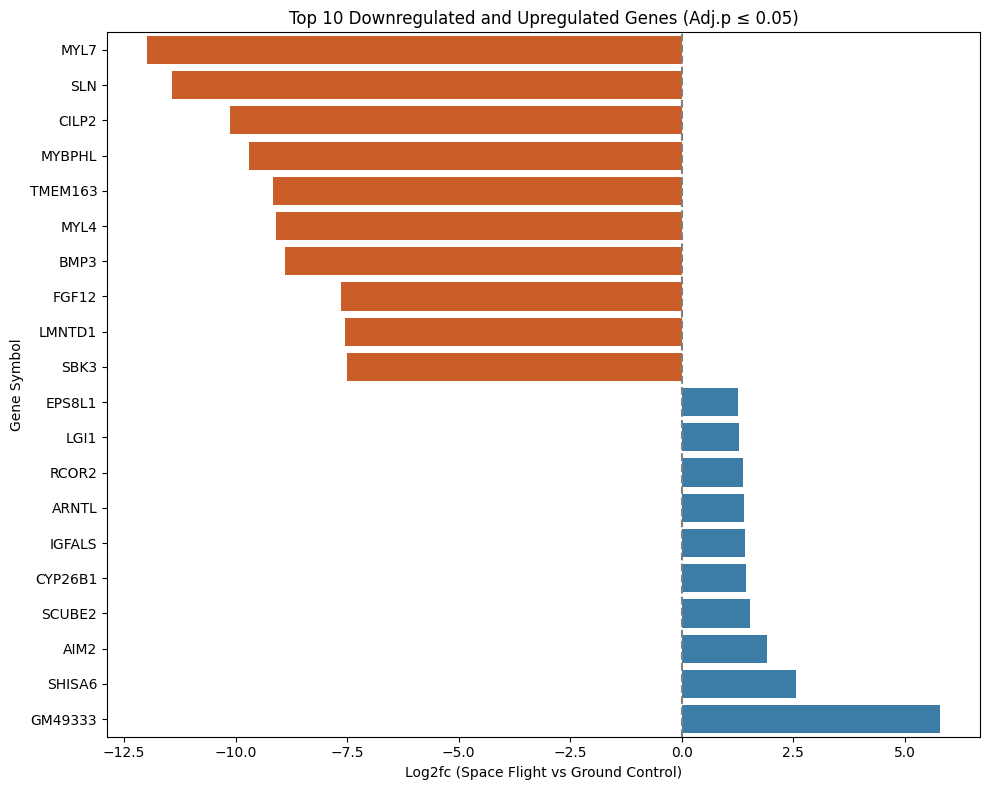

In [48]:
top_bottom_20['Direction'] = top_bottom_20['Log2fc_(Space Flight)v(Ground Control)'].apply(
    lambda x: 'Upregulation' if x > 0 else 'Downregulation'
)
color_palette = {'Upregulation': '#2c7fb8', 'Downregulation': '#e6550d'}  # green and red

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Log2fc_(Space Flight)v(Ground Control)',
    y='SYMBOL',
    data=top_bottom_20.sort_values('Log2fc_(Space Flight)v(Ground Control)', ascending=True),
    palette=color_palette,
    hue='Direction'
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 10 Downregulated and Upregulated Genes (Adj.p ≤ 0.05)')
plt.xlabel('Log2fc (Space Flight vs Ground Control)')
plt.ylabel('Gene Symbol')
plt.tight_layout()
plt.legend().remove()
plt.show()

## Select genes of interest

In [49]:
genes_of_interest = ['ARNTL', 'AIM2', 'SLN', 'FGF12']
selected_genes_df = filtered_df[filtered_df['SYMBOL'].isin(genes_of_interest)]
selected_genes_df

,ENSEMBL,SYMBOL,GENENAME,Log2fc_(Space Flight)v(Ground Control),Stat_(Space Flight)v(Ground Control),P.value_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control),ENTREZID,STRING_id,GOSLIM_IDS,REFSEQ
3130,ENSMUSG00000022523,FGF12,fibroblast growth factor 12,-7.635786,-5.360704,8.289815e-08,0.000086,14167,10090.ENSMUSP00000097601,GO:0010628|GO:0031399|GO:0051246|GO:0051171|GO...,NM_001276419|NM_001276420|NM_001357064|NM_0101...
8949,ENSMUSG00000037860,AIM2,absent in melanoma 2,1.908337,3.738510,1.851143e-04,0.030136,383619,10090.ENSMUSP00000119465,GO:0010033|GO:0050896|GO:0051716|GO:0070887|GO...,NM_001013779|NP_001013801|XM_006496919|XM_0064...
10197,ENSMUSG00000042045,SLN,sarcolipin,-11.418798,-5.680210,1.345297e-08,0.000020,66402,10090.ENSMUSP00000036950,NaN,NM_025540|NP_079816
12191,ENSMUSG00000055116,ARNTL,aryl hydrocarbon receptor nuclear translocator...,1.387939,3.873632,1.072252e-04,0.018705,11865,10090.ENSMUSP00000046235,GO:0006725|GO:0048511|GO:0051171|GO:0016070|GO...,NM_001243048|NM_001357070|NM_001368412|NM_0013...


## Run Gene Set Enrichment Analysis

In [50]:
gene_list = top_bottom_20['SYMBOL'].dropna().tolist()

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets='GO_Biological_Process_2021',
    organism='Mouse',
    outdir=None,
)

## Get top 10 enriched terms

In [51]:
top_terms = enr.results.sort_values('Adjusted P-value').head(10)
top_terms_sorted = top_terms.sort_values('Combined Score', ascending=False)

In [52]:
term_list = top_terms_sorted['Term'].tolist()
print(', '.join(term_list))

regulation of voltage-gated sodium channel activity (GO:1905150), regulation of transmission of nerve impulse (GO:0051969), negative regulation of glucocorticoid receptor signaling pathway (GO:2000323), regulation of protein depolymerization (GO:1901879), regulation of relaxation of muscle (GO:1901077), negative regulation of retinoic acid receptor signaling pathway (GO:0048387), excitatory chemical synaptic transmission (GO:0098976), regulation of glucocorticoid receptor signaling pathway (GO:2000322), regulation of cation channel activity (GO:2001257), muscle contraction (GO:0006936)


## Plot top enriched biological processes and corresponding combined scores

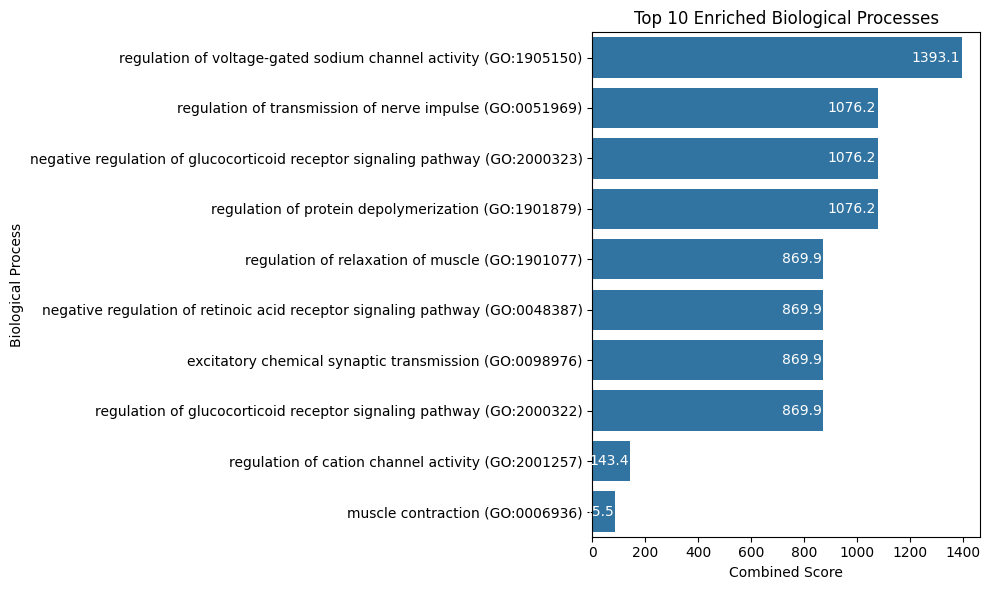

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_terms_sorted,
    x='Combined Score',
    y='Term',
)

for i, (score, term) in enumerate(zip(top_terms_sorted['Combined Score'], top_terms_sorted['Term'])):
    ax.text(score - 5, i, f'{score:.1f}', va='center', ha='right', color='white', fontsize=10)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 10 Enriched Biological Processes')
plt.xlabel('Combined Score')
plt.ylabel('Biological Process')
plt.tight_layout()
plt.show()
